<a href="https://colab.research.google.com/github/rladbtls3/202401PracticeForAiDeeplearning/blob/main/chapter04_getting_started_with_neural_networks_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
#하나의 parameter 'num_words'

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]
#리뷰 문장의 단어들을 각각 숫자에 할당, 즉 학습 데이터의 숫자 배열은 리뷰 문장의 배열화

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()#단어 -> 정수로의 인덱스 지도

#정수 -> 단어로의 인덱스 지도
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

#train_data[0]에 존재하는 값들과 비교, 인덱스 내에 없는 단어들은 "?"로 출력해준다.
#3을 뺀 이유는 패딩이 돼서 인덱스가 일치하지 않게 되었으므로. 3을 빼주면 인덱스가 일치한다. 즉, 그냥 이건 코더가 데이터 형식에 맞춰서 인덱스 일치시켜준거.
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
word_index#각 단어에 해당하는 배열 수의 인덱스

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
#입력 데이터의 배열 길이가 각각이므로, 이를 하나로 맞춰주는 전처리 과정
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]#multi-hot incoding
#one-hot vector과 같은 원리. 길이 1만의 배열로, 있으면 1 / 없으면 0

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

#모델 만들기
#입력층 노드 10000, 입력 데이터 수 25000
#은닉층1 노드 16, 활성화함수 Relu
#은닉층2 노드 16, 활성화함수 Relu
#출력층 노드 1, 활성화함수 시그모이드
#긍정 or 부정의 이항식이므로 출력노드는 하나만 해도 됨
#시그모이드 사용 -> 출력값이 1에 가까울수록 긍정적 리뷰라고 판단. 0에 가까우면 부정적.
#은닉층을 전부 지운 게 val_loss가 가장 낮네...?
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
#검증 데이터와 학습 데이터 분할
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
#과적합 또는 과소적합 시점 판단을 위한 history 선언
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

#어느 시점부터 val_loss와 val_accuracy가 우리의 바램과는 다르게 움직임이 보인다. 과적합? 과소적합?

Epoch 1/20
30/30 [==============================] - 5s 68ms/step - loss: 0.5347 - accuracy: 0.7611 - val_loss: 0.4436 - val_accuracy: 0.8048
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3311 - accuracy: 0.8921 - val_loss: 0.3253 - val_accuracy: 0.8783
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2471 - accuracy: 0.9202 - val_loss: 0.2926 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1966 - accuracy: 0.9364 - val_loss: 0.2779 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1661 - accuracy: 0.9475 - val_loss: 0.2883 - val_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1379 - accuracy: 0.9579 - val_loss: 0.2926 - val_accuracy: 0.8840
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1188 - accuracy: 0.9645 - val_loss: 0.3155 - val_accuracy: 0.8796
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

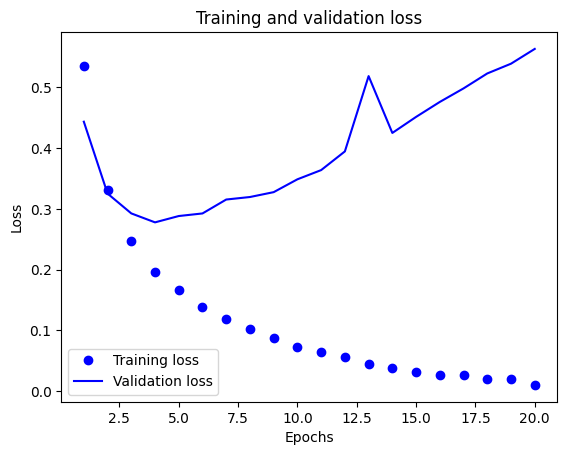

In [ ]:
#loss plot
#결과 보니까 대충 5~10 에포크 즈음에 과적합이 일어난다. 과소적합인가...?
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

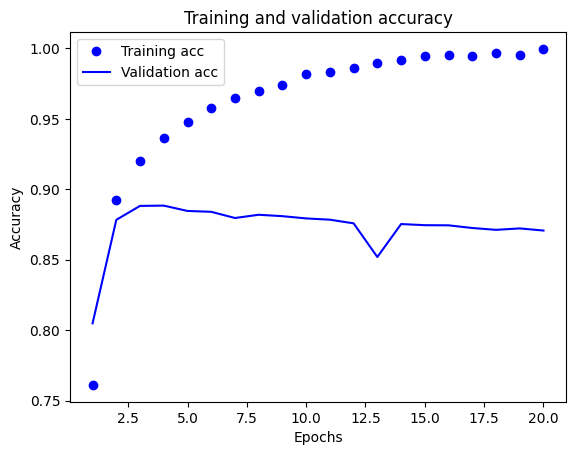

In [ ]:
#accuracy plot
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4769 - accuracy: 0.8081
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2760 - accuracy: 0.9026
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2153 - accuracy: 0.9222
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2863 - accuracy: 0.8842


In [ ]:
results

[0.286332368850708, 0.8841599822044373]

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.22294746],
       [0.99929047],
       [0.8176525 ],
       ...,
       [0.09497567],
       [0.06312639],
       [0.4984783 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [ ]:
#은닉층1 노드 64, 활성화함수 relu
#은닉층2 1과 동일
#출력층 노드 46, 활성화함수 softmax
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 36ms/step - loss: 2.6109 - accuracy: 0.5184 - val_loss: 1.7767 - val_accuracy: 0.6180
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.5145 - accuracy: 0.6822 - val_loss: 1.3715 - val_accuracy: 0.6930
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.1723 - accuracy: 0.7511 - val_loss: 1.1890 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.9487 - accuracy: 0.7988 - val_loss: 1.0672 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 0s 23ms/step - loss: 0.7819 - accuracy: 0.8320 - val_loss: 1.0092 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 0s 24ms/step - loss: 0.6473 - accuracy: 0.8659 - val_loss: 0.9375 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 29ms/step - loss: 0.5333 - accuracy: 0.8869 - val_loss: 0.9096 - val_accuracy: 0.8020
Epoch 8/20
16

**Plotting the training and validation loss**

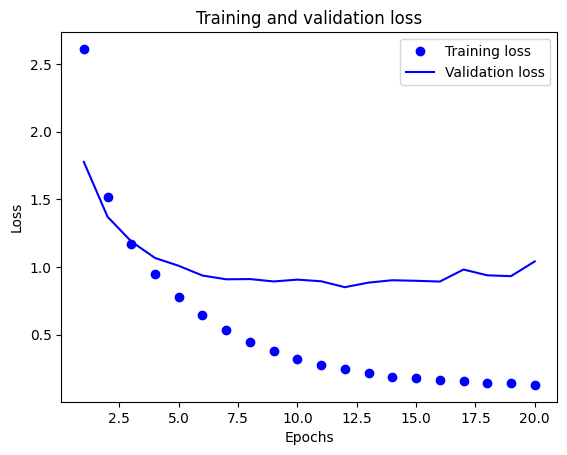

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

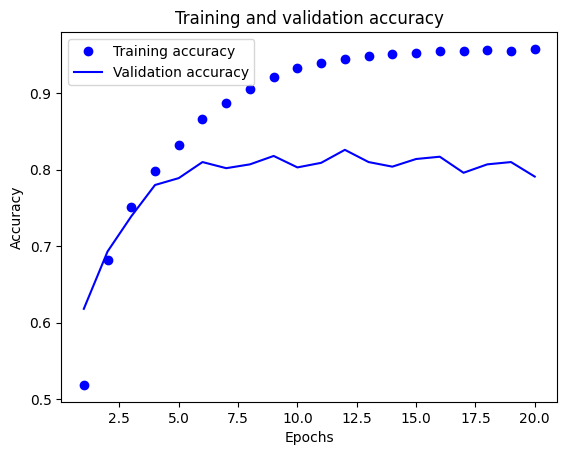

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 13ms/step - loss: 2.7639 - accuracy: 0.4991
Epoch 2/9
18/18 [==============================] - 0s 14ms/step - loss: 1.5080 - accuracy: 0.6899
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 1.1260 - accuracy: 0.7572
Epoch 4/9
18/18 [==============================] - 0s 15ms/step - loss: 0.9049 - accuracy: 0.8056
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7486 - accuracy: 0.8395
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6183 - accuracy: 0.8716
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5162 - accuracy: 0.8918
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4337 - accuracy: 0.9077
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9102 - accuracy: 0.7983


In [ ]:
results

[0.9101905822753906, 0.7983080744743347]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1794300979519145

### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#손실함수 쓰는 경우 구분도 해놔야할듯
#categoriacal 교차엔트로피의 경우는 위처럼 lable을 변환했을 경우 사용한다는데...정확히 언제 쓰는거지?

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 14ms/step - loss: 2.3330 - accuracy: 0.5212 - val_loss: 1.5862 - val_accuracy: 0.6270
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 1.3518 - accuracy: 0.6880 - val_loss: 1.2866 - val_accuracy: 0.7230
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0652 - accuracy: 0.7613 - val_loss: 1.1431 - val_accuracy: 0.7520
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8720 - accuracy: 0.8143 - val_loss: 1.0544 - val_accuracy: 0.7770
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 0.7136 - accuracy: 0.8406 - val_loss: 1.0044 - val_accuracy: 0.7830
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.5888 - accuracy: 0.8670 - val_loss: 0.9685 - val_accuracy: 0.7890
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.4889 - accuracy: 0.8886 - val_loss: 0.9542 - val_accuracy: 0.8030
Epoch 8/20
63/63 [=

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [ ]:
#보스턴 집값 예측하기
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
#404개의 훈련 데이터, 13개의 features
train_data.shape

(404, 13)

In [ ]:
#102개의 검증 데이터, 13개의 features
test_data.shape

(102, 13)

In [ ]:
#값을 보면 다 제각각...정규화가 필요
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [ ]:
#평균 빼고 S.D로 나눠서 정규화
#정규화를 하지 않을 경우 가중치 수렴에 시간이 오래 소요됨
#parameters can be updated in equal proportions 라고 한다
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)#regression prob에서는 출력층에 activation func 불필요
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])#MSE 이용
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
#k개의 fold를 만들어서 진행하는 교차검증
# 총 데이터 개수가 적은 data set에 대하여 정확도 향상 가능
#기존의 Trainng / Validation / Test의 세 개의 집단으로 분류하는 것보다, Training과 Test로만
#분류했을 때의 학습 데이터 셋이 더 많기 때문
#즉, 데이터 수가 안 그래도 적은데 검증과 테스트에 데이터 셋을 더 할당하면 과소적합되는 경우가 생기는데
#이를 피하기 위함

#Training data set과 test data set을 나눈다
#training을 k개의 fold로 나눈다
#한 개의 fold 내 데이터를 다시 k개로 분할, (k-1)개는 training data, 나머지 한 개는 Validation data로 지정
#모델을 생성, 예측한 후 이에 대한 error를 도출
#다음 fold에서는 validation을 바꿔서 지정, 이전과 겹치지 않도록
#이 과정을 k개의 fold에 대해 한 번씩, 총 k번 시행한다.

#각각의 fold의 시행에서 기록된 error를 바탕(보통 error의 평균), 최적의 모델 만들기
#해당 모델에 전체 training data를 학습
#학습 이후 처음에 분할하였던 test data set으로 평가

#적은 데이터 셋을 가지고도 과소적합을 방지할 수 있지만, 일반적인 학습법에 비해 시간 소요가 크다

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = [] #validation score 저장
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()#모델 만들기
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)#모델 적합
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[2.1112492084503174, 2.4105732440948486, 2.403707265853882, 2.440748691558838]

In [ ]:
np.mean(all_scores)#val score의 평균? 맞나?

2.3415696024894714

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []#val mae를 각 epoch마다 저장하기 위한 변수
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

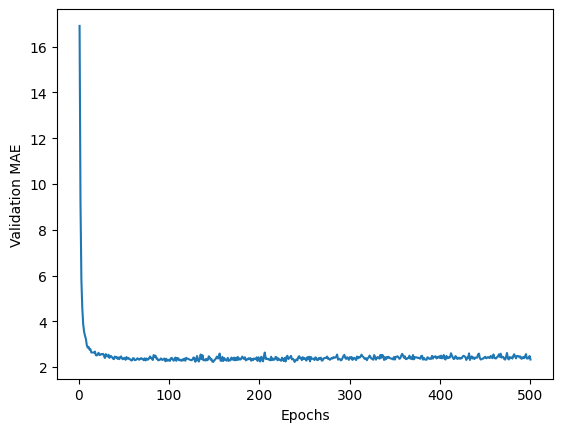

In [ ]:
#500 epoch 동안 모델의 val mae를 도식화
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

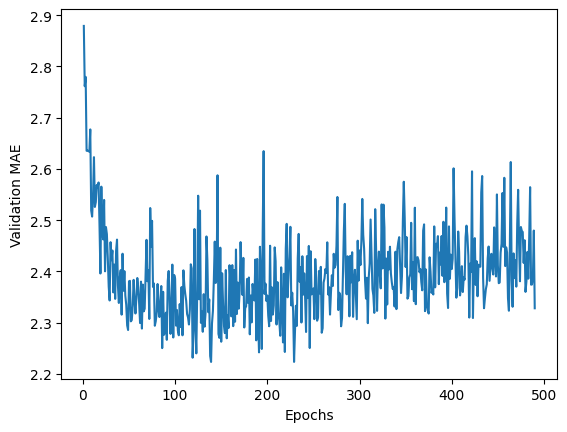

In [ ]:
truncated_mae_history = average_mae_history[10:]
#scale 문제 때문에 상세한 validation MAE의 차이가 보이지 않음
#값이 비교적 큰 10개의 데이터를 제외하고 plot을 그리면 차이가 잘 보인다.

plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()
#대략 130 epoch전후로 과적합이 발생하여 val MAE가 증가하기 시작하는 게 보임

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)#위 결과를 바탕으로 130 epoch 정도만 학습, 모델 적합
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 13.7735 - mae: 2.5872


In [ ]:
test_mae_score

2.5872302055358887

### Generating predictions on new data

In [ ]:
#적합한 모델을 이용한 예측
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 2ms/step


array([7.1683373], dtype=float32)

### Wrapping up

## Summary